IPML Project

Importing libraries

In [2]:
import numpy as np
from skimage import data, color,io, exposure
from matplotlib import pyplot as plt
from skimage.transform import rescale
from skimage.restoration import denoise_tv_chambolle 
from skimage.feature import canny
from skimage.color.colorconv import rgb2hsv
from google.colab import drive
from PIL import Image
import os

import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Utility functions

In [3]:
def show_image(img,title = ""):
  io.imshow(img)
  plt.title(title)
  plt.show()

def load_image(path=""):
  if path == "":
    return io.imread('/content/drive/MyDrive/ShantanuDalRice/DalRice (1).jpeg')
  else:
    img = io.imread(path)
    return img

Preprocessing image functions

In [49]:
def quarter_rescale_image(img):
  image_rescaled = rescale(img, 1/4, anti_aliasing=True, multichannel=True)
  #show_image(img, 'Original image')
  #show_image(image_rescaled, 'Rescaled image')
  return image_rescaled

def adjust_exposure(gray_scaled_image):
  exposure_image = exposure.equalize_hist(gray_scaled_image)
  show_image(exposure_image)
  return exposure_image

def exposure_auto_equalize(img):
  image_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
  # show_image(image_adapteq)
  return image_adapteq

def turn_into_grayscale(img):
  gray_scaled_image = color.rgb2gray(img)
  # show_image(gray_scaled_image)
  return gray_scaled_image

def adaptive_exposure(img):
  image_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
  show_image(image_adapteq)
  return image_adapteq

def denoise_image(img):
  denoised_image = denoise_tv_chambolle(img,weight=0.1,multichannel=True)
  # show_image(img, 'Noisy image')
  # show_image(denoised_image, 'Denoised image')
  return denoised_image

def detect_edge(img):
 canny_edges = canny(img, sigma=2.5).astype(int) 
 #show_image(canny_edges, "Edges with Canny") 
 return canny_edges

def convert_to_hsv(img):
  hsv_image = rgb2hsv(img)
  return hsv_image

def plot_histogram_rgb(img, title="", bins_value=256):
  plt.hist(img.ravel(), bins=bins_value)
  plt.title(title)
  plt.show()

def print_hsv(img):
  hsv_image = convert_to_hsv(img)
  hue_img = hsv_image[:, :, 0]
  sat_img = hsv_image[:, :, 1]
  val_img = hsv_image[:, :, 2]
  show_image(hue_img)
  show_image(sat_img)
  show_image(val_img)

def save_image_to_drive(img,path):
  img = (img * 255).astype(np.uint8)
  im = Image.fromarray(img)
  im.save(path)

In [5]:
dal = load_image("/content/drive/MyDrive/ShantanuDalRice/DalRice (68).jpeg")
rice = load_image("/content/drive/MyDrive/ShantanuDalRice/DalRice (63).jpeg")

In [6]:
#resize image
dal_rz = quarter_rescale_image(dal)
rice_rz = quarter_rescale_image(rice)

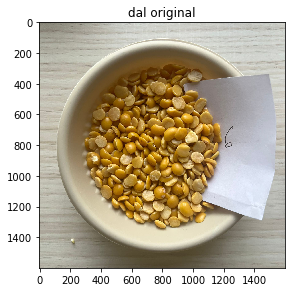

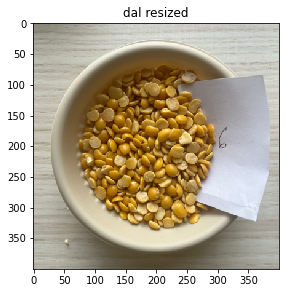

In [7]:
show_image(dal,'dal original')
show_image(dal_rz, 'dal resized')

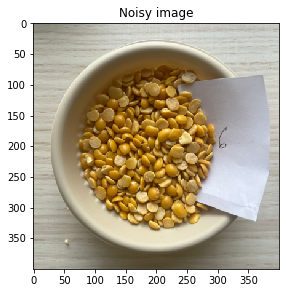

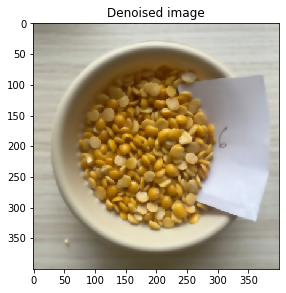

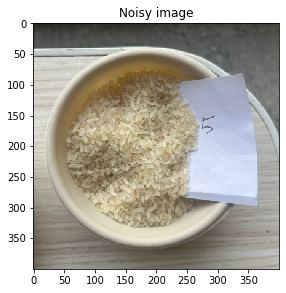

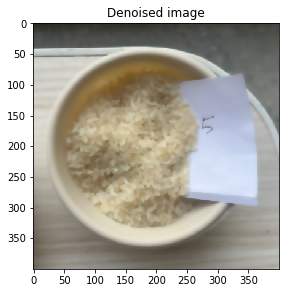

In [8]:
dal_denoised = denoise_image(dal_rz)
rice_denoised = denoise_image(rice_rz)

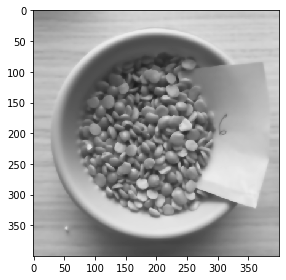

/usr/local/lib/python3.8/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


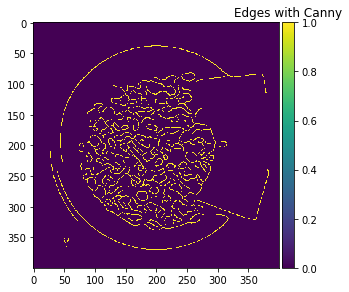

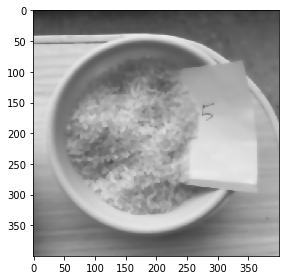

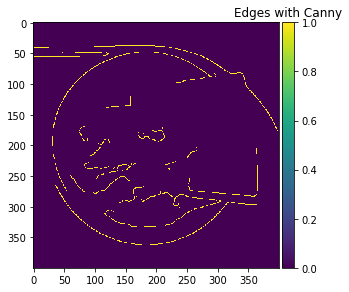

In [9]:
dal_egde = detect_edge(turn_into_grayscale(dal_denoised))
rice_egde = detect_edge(turn_into_grayscale(rice_denoised))

In [10]:
save_image_to_drive(dal_egde,"/content/drive/MyDrive/Edgypics/dal.jpg")
save_image_to_drive(rice_egde,"/content/drive/MyDrive/Edgypics/rice.jpg")

In [11]:

dal_1 =  quarter_rescale_image(load_image("/content/drive/MyDrive/ShantanuDalRice/DalRice (71).jpeg"))
dal_2 =  quarter_rescale_image(load_image("/content/drive/MyDrive/ShantanuDalRice/DalRice (94).jpeg"))
rice_1 =  quarter_rescale_image(load_image("/content/drive/MyDrive/ShantanuDalRice/DalRice (20).jpeg"))
rice_2 = quarter_rescale_image(load_image("/content/drive/MyDrive/ShantanuDalRice/DalRice (36).jpeg"))

In [12]:
from skimage import metrics
ss = metrics.variation_of_information(dal_egde,rice_egde)

In [13]:
dal_1

array([[[0.52352941, 0.51568627, 0.46470588],
        [0.53333333, 0.5254902 , 0.4745098 ],
        [0.53137255, 0.52352941, 0.47254902],
        ...,
        [0.76176471, 0.76568627, 0.74215686],
        [0.77745098, 0.78137255, 0.75784314],
        [0.77647059, 0.78039216, 0.75686275]],

       [[0.54117647, 0.53333333, 0.48235294],
        [0.54901961, 0.54117647, 0.49019608],
        [0.54705882, 0.53921569, 0.48823529],
        ...,
        [0.75      , 0.75392157, 0.73039216],
        [0.75196078, 0.75588235, 0.73235294],
        [0.75098039, 0.75490196, 0.73137255]],

       [[0.54901961, 0.54117647, 0.49019608],
        [0.54901961, 0.54117647, 0.49019608],
        [0.54803922, 0.54019608, 0.48921569],
        ...,
        [0.73333333, 0.7372549 , 0.71372549],
        [0.72058824, 0.7245098 , 0.70098039],
        [0.71568627, 0.71960784, 0.69607843]],

       ...,

       [[0.66960784, 0.66176471, 0.61078431],
        [0.67745098, 0.66960784, 0.61862745],
        [0.68039216, 0

In [14]:
ss2 = metrics.structural_similarity(rice_1,rice_2,multichannel=True)

In [15]:
ss2

0.5068073084871378

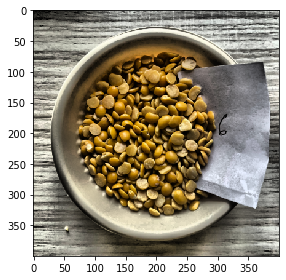

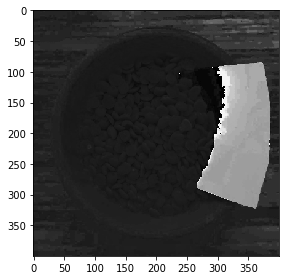

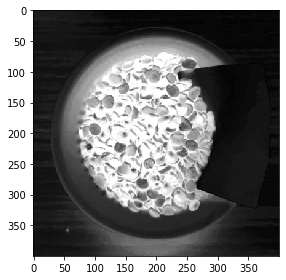

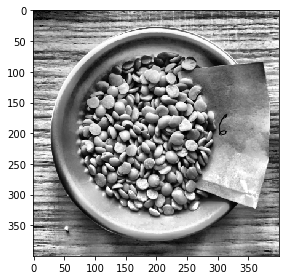

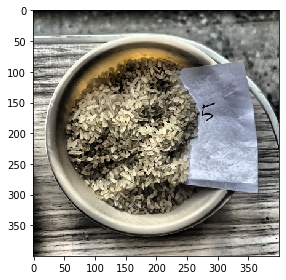

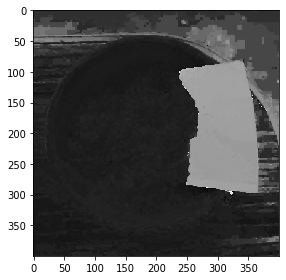

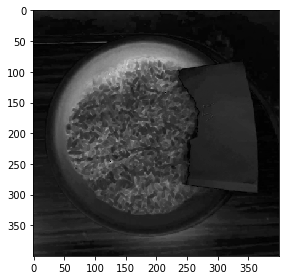

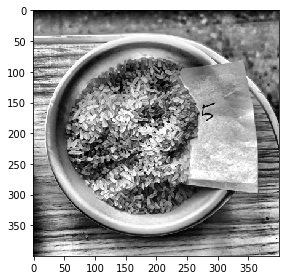

In [16]:
print_hsv(exposure_auto_equalize(dal_rz))
print_hsv(exposure_auto_equalize(rice_rz))

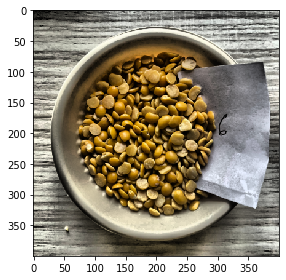

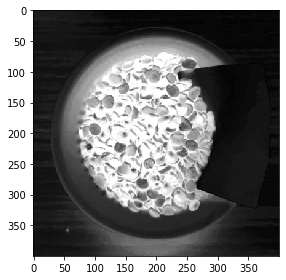

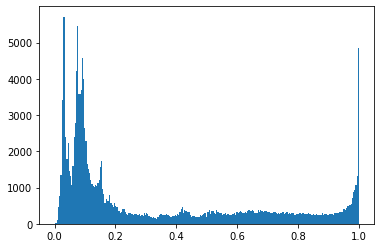

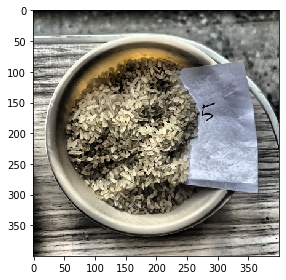

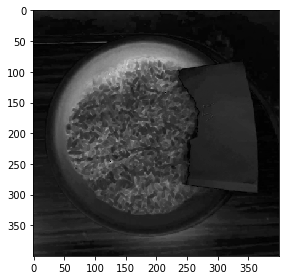

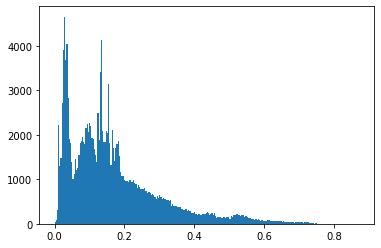

In [17]:
dal_hist_sat = convert_to_hsv(exposure_auto_equalize(dal_rz))
show_image(dal_hist_sat[:,:,1])
plot_histogram_rgb(dal_hist_sat[:,:,1])

rice_hist_sat = convert_to_hsv(exposure_auto_equalize(rice_rz))
show_image(rice_hist_sat[:,:,1])
plot_histogram_rgb(rice_hist_sat[:,:,1])

In [18]:
def get_images_info(label,path,ohe_label):
  info = []
  if ohe_label == 1:
    ohe = [0,1]
  elif ohe_label == 2:
    ohe = [1,0]
  for root, __, files in os.walk(path):
    for f in files:
        if f.endswith(".jpeg"):
          info.append({
                      "img": Image.open(os.path.join(root, f)), # add an appropriate reading flag if you want
                      # optional
                      label : str(f),
                      'ohe_label' : ohe,
                      'type' : ohe_label
          })
  return info

In [19]:
dal_labels = get_images_info('dal',"/content/drive/MyDrive/ShantanuDalRiceLabelled/dal", 1)
rice_labels = get_images_info('rice',"/content/drive/MyDrive/ShantanuDalRiceLabelled/rice",2)

In [20]:
dal_labels = get_images_info('dal',"/content/drive/MyDrive/ShantanuDalRiceLabelled/dal", 1)
rice_labels = get_images_info('rice',"/content/drive/MyDrive/ShantanuDalRiceLabelled/rice",2)

In [21]:
dal_labels_2 = get_images_info('dal',"/content/drive/MyDrive/ShantanuDalRiceLabelled/dal", 1)
rice_labels_2 = get_images_info('rice',"/content/drive/MyDrive/ShantanuDalRiceLabelled/rice",2)


In [22]:
train_data = []
train_labels = []
for i in dal_labels:
  data = np.asarray(i['img'])
  label = i['type']
  train_data.append(data)
  train_labels.append(label)
for i in rice_labels:
  data = np.asarray(i['img'])
  label = i['type']
  train_data.append(data)
  train_labels.append(label)

In [23]:
train_data
train_labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [28]:
train_data = np.asarray(train_data)

In [29]:
train_data.shape
np.array(train_labels).shape

(101,)

In [34]:
train_data

array([[[[178, 178, 178],
         [176, 176, 176],
         [177, 177, 177],
         ...,
         [195, 196, 190],
         [197, 198, 192],
         [198, 199, 193]],

        [[177, 177, 177],
         [175, 175, 175],
         [175, 175, 175],
         ...,
         [196, 197, 191],
         [197, 198, 192],
         [198, 199, 193]],

        [[185, 185, 185],
         [181, 181, 181],
         [179, 179, 179],
         ...,
         [197, 198, 192],
         [197, 198, 192],
         [197, 198, 192]],

        ...,

        [[146, 145, 140],
         [148, 147, 142],
         [148, 147, 142],
         ...,
         [149, 143, 131],
         [142, 136, 124],
         [136, 130, 118]],

        [[141, 140, 135],
         [143, 142, 137],
         [143, 142, 137],
         ...,
         [150, 144, 132],
         [146, 140, 128],
         [143, 137, 125]],

        [[139, 138, 133],
         [141, 140, 135],
         [140, 139, 134],
         ...,
         [149, 143, 131],
        

In [86]:
def get_prediction(path):
  img_rgb = quarter_rescale_image(load_image(path))
  img_hsv = convert_to_hsv(img_rgb)
  saturation = img_hsv[:,:,1]
  value = img_hsv[:,:,2]
  edge_val = detect_edge(turn_into_grayscale(img_rgb))
  print(edge_val.mean()*100)
  print(saturation.mean())
  if saturation.mean() > 0.23 and edge_val.mean()*100 > 4:
    return "image is dal"
  else: 
    return "image is rice"

In [87]:
get_prediction("/content/drive/MyDrive/TestImage/testimg (17).jpeg")

3.717041015625
0.21145179225246125


'image is rice'

In [72]:
def compute_features(train_data):
  X = np.empty(4)
  for img in train_data:
    
    rz_image = quarter_rescale_image(img)
    exp_image = exposure_auto_equalize(rz_image)
    denoised_image = denoise_tv_chambolle(exp_image,weight=0.1,multichannel=True)
    hsv_image = convert_to_hsv(denoised_image)
    
    edges = detect_edge(turn_into_grayscale(denoised_image))
    hue_img = hsv_image[:, :, 0]
    sat_img = hsv_image[:, :, 1]
    val_img = hsv_image[:, :, 2]
    
    a = np.array([edges.mean(), hue_img.mean(),  sat_img.mean(), val_img.mean()])
    X = np.vstack((X, a))
  X = X[1:]
  return X
    


In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = compute_features(train_data)
y = np.array(train_labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
  
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)
  
print(knn.predict(X_test))

[2 2 2 2 1 1 1 1 1 1 1 1 2 1 2 1 2 2 1 1 2]


In [84]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, knn.predict(X_test)))

Accuracy: 1.0


In [91]:
def convert_to_features(img):
    rz_image = quarter_rescale_image(img)
    exp_image = exposure_auto_equalize(rz_image)
    denoised_image = denoise_tv_chambolle(exp_image,weight=0.1,multichannel=True)
    hsv_image = convert_to_hsv(denoised_image)
    
    edges = detect_edge(turn_into_grayscale(denoised_image))
    hue_img = hsv_image[:, :, 0]
    sat_img = hsv_image[:, :, 1]
    val_img = hsv_image[:, :, 2]
    
    a = np.array([edges.mean(), hue_img.mean(),  sat_img.mean(), val_img.mean()])
    
    return a.reshape(1, -1)

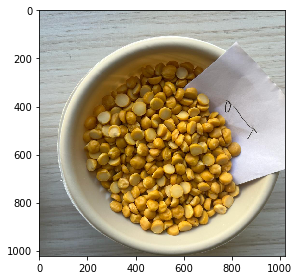

Image is dal


In [99]:
result = knn.predict(convert_to_features(load_image("/content/drive/MyDrive/TestImage/testimg (27).jpeg")))
show_image("/content/drive/MyDrive/TestImage/testimg (27).jpeg")
if result[0]==1:
  print("Image is dal")
else:
  print("Image is rice")

In [94]:
get_prediction("/content/drive/MyDrive/TestImage/testimg (17).jpeg")

3.717041015625
0.21145179225246125


'image is rice'